In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
from sklearn.model_selection import train_test_split
import os

In [4]:
np.random.seed(1)

In [5]:
train_images = []
train_labels = []
shape = (300,300)
train_path = "datasets/fruits/train"

for fname in os.listdir("datasets/fruits/train"):
    if fname.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,fname))
        train_labels.append(fname.split('_')[0])
        img = cv2.resize(img,shape)
        train_images.append(img)
        
train_labels = pd.get_dummies(train_labels).values
train_images = np.array(train_images)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, random_state=1)

In [7]:
test_images = []
test_labels = []
shape = (300,300)
test_path = "datasets/fruits/test"

for fname in os.listdir("datasets/fruits/test"):
    if fname.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,fname))
        test_labels.append(fname.split('_')[0])
        img = cv2.resize(img,shape)
        test_images.append(img)
test_images = np.array(test_images)

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

# Model

In [9]:
model = Sequential()

#input layer
model.add(Conv2D(kernel_size=(3,3), filters = 32, activation= 'relu', input_shape = (300, 300,3)))

# hidden layer-1
model.add(Conv2D(kernel_size=(3,3),filters = 30, activation = 'relu'))
model.add(MaxPooling2D(3,3))

# hidden layer-2
model.add(Conv2D(kernel_size=(3,3),filters = 30, activation = 'relu'))
model.add(MaxPooling2D(3,3))

# hidden layer-3
model.add(Conv2D(kernel_size=(3,3),filters = 30, activation = 'relu'))
model.add(MaxPooling2D(3,3))

# Flatten Layer
model.add(Conv2D(kernel_size=(3,3),filters = 30, activation = 'relu'))
model.add(Flatten())

# Dense layer or Fully connected layers
model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))


In [10]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 296, 296, 30)      8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 30)        0

In [12]:
model_data  = model.fit(x_train, 
                        y_train,
                       epochs=10,
                       batch_size = 50,
                       validation_data=(x_test, y_test))

Epoch 1/10
4/4 [==============================] - 7s 2s/step - loss: 1.3470 - accuracy: 0.4000 - val_loss: 1.2580 - val_accuracy: 0.2833
Epoch 2/10
4/4 [==============================] - 6s 2s/step - loss: 1.3499 - accuracy: 0.3056 - val_loss: 1.2553 - val_accuracy: 0.4000
Epoch 3/10
4/4 [==============================] - 6s 2s/step - loss: 1.2977 - accuracy: 0.3611 - val_loss: 1.2521 - val_accuracy: 0.4000
Epoch 4/10
4/4 [==============================] - 6s 2s/step - loss: 1.2908 - accuracy: 0.3500 - val_loss: 1.2148 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 6s 1s/step - loss: 1.2419 - accuracy: 0.6389 - val_loss: 1.1243 - val_accuracy: 0.5333
Epoch 6/10
4/4 [==============================] - 6s 1s/step - loss: 1.1614 - accuracy: 0.5944 - val_loss: 1.0059 - val_accuracy: 0.7167
Epoch 7/10
4/4 [==============================] - 6s 1s/step - loss: 1.0112 - accuracy: 0.6889 - val_loss: 0.8855 - val_accuracy: 0.6333
Epoch 8/10
4/4 [=========================

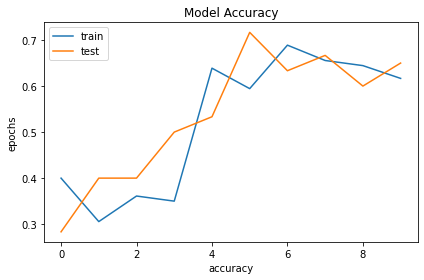

In [15]:
plt.plot(model_data.history['accuracy'])
plt.plot(model_data.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("accuracy")
plt.ylabel('epochs')
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

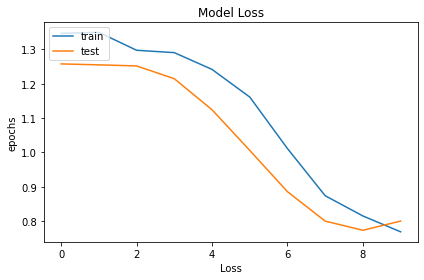

In [16]:
plt.plot(model_data.history['loss'])
plt.plot(model_data.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel('epochs')
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [17]:
model_evaluate = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 160ms/step - loss: 0.7999 - accuracy: 0.6500


In [18]:
print(model_evaluate)

[0.7998673319816589, 0.6499999761581421]


In [33]:
x, y = map(int, input().split())
image_name = test_images[x:y]
label_names = test_labels[x:y]

predicted = model.predict(np.array(image_name))
output = {0: 'apple', 
         1: "banana",
         2: 'mixed',
         3: 'orange'}


print("Actual values names: \t", label_names)
print("Pridicted Values names: \t", output[np.argmax(predicted)])

 54 55


Actual values names: 	 ['orange']
Pridicted Values names: 	 orange
